## Demo 1 - Distanz

Dies ist ein Jupyter Notebook, welches auf mybinder.org gehostet wird. Alle Eingaben werden nach Beendigung gelöscht. 

Jupyter Notebooks enthalten Text- oder Codeblöcke. Codeblöcke werden durch SHIFT-ENTER ausgeführt (Dreiecksymbol oben rechts auf Mobil).

Solange ein Block ausgeführt wird, wird nicht mehr die Nr [3] des Blocks, sondern [*] angezeigt.

### Initialisierung

In [10]:
# Gensim ist die Standard Word2Vec-Implementation
import gensim

# Check, welche Version genutzt wird. Ändert sich häufig mit starken Änderungen.
print(gensim.__version__)

# Modell mit Top 5000 deutschen Worten laden
model = gensim.models.KeyedVectors.load_word2vec_format("min5000.model", binary=True)

# FutureWarning ignorieren
import warnings
warnings.filterwarnings('ignore')

3.6.0


### Nächste Nachbarn anzeigen

In [11]:
# Die 10 Wörter laden, die München am Nächsten sind und Wahrscheinlichkeiten dazu ausgegen.

matches = model.most_similar(positive=["Muenchen"], negative=None, topn=10)

matches

[('Muenchner', 0.7908819913864136),
 ('Augsburg', 0.7286888360977173),
 ('Nuernberg', 0.7239000797271729),
 ('FC_Bayern', 0.7078144550323486),
 ('Dortmund', 0.7041417360305786),
 ('Bayern', 0.6823953986167908),
 ('Hamburg', 0.6818069219589233),
 ('Duesseldorf', 0.6732111573219299),
 ('Stuttgart', 0.6708148717880249),
 ('Regensburg', 0.6612198352813721)]

### Wort-Mathematik

In [9]:
# Muenchen ist zu Bayern wie Hannover zu ???

matches = model.most_similar(positive=["Hannover", "Bayern"], negative=["Muenchen"], topn=10)

matches

[('Niedersachsen', 0.7528911828994751),
 ('Hessen', 0.6565377712249756),
 ('Braunschweig', 0.6402816772460938),
 ('Bremen', 0.6086529493331909),
 ('Schleswig-Holstein', 0.5892189741134644),
 ('Sachsen', 0.585659384727478),
 ('Baden-Wuerttemberg', 0.567304253578186),
 ('Nordrhein-Westfalen', 0.5669426918029785),
 ('Sachsen-Anhalt', 0.5653688907623291),
 ('Wolfsburg', 0.5581339001655579)]

### Visualisierung von Wordvektoren

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

print('geladen')

geladen


### Definieren der Anzeigefunktion

In [13]:
# By: https://github.com/devmount/GermanWordEmbeddings/blob/master/visualize.py

# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in range(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

### 2-D Visualisierung von Nachbarn

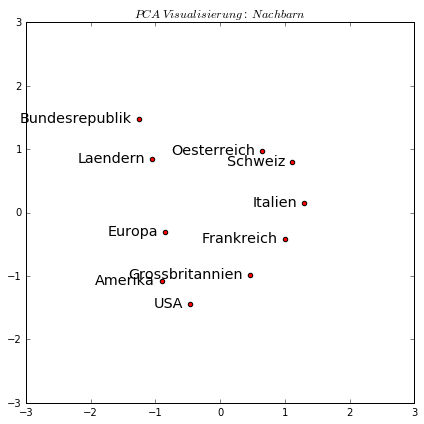

In [22]:
# Nachbarn suchen und anzeigen
matches = model.most_similar(positive=["Deutschland"], negative=[], topn=10)
words = [match[0] for match in matches]
draw_words(model, words, True, False, False, -3, 3, -3, 3, r'$PCA\ Visualisierung:\ Nachbarn$')